# Econometria de Séries Temporais

## VAR: função impulso-resposta

João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

**Motivação**: \\

 Qual é o impacto de um aumento na taxa de jde preços livres na taxa de juros real? Ou de um aumento da taxa de inflação de preços administrados na taxa de inflação de preços livres? Vamos utilizar um dos modelos de vetores autorregressivos do [box do Relatório de Inflação do BCB - jun/2004](https://www.bcb.gov.br/content/ri/relatorioinflacao/200406/RELINF200406-ri200406b8p.pdf) para responder essa pergunta em duas partes. Na aula passada, avaliamos alguns modelos VAR. Nesta, vamos utilizar o VAR com dummies sazonais, como fez o BCB, para responder as perguntas acima.

# Dados: taxas de inflação (preços livres e preços administrados), taxa de câmbio nominal, taxa de juros real

Faça o upload dos resultados produzidos com o notebook da primeira aula sobre VAR. Quando o arquivo estiver na máquina 'virtual' do Google, utilize a função load (lembre-se de ajustar o código abaixo com base no nome que você utilizou para salvar o arquivo):

In [ ]:
load("var.RData")

Warning message:
“namespace ‘vars’ is not available and has been replaced
by .GlobalEnv when processing object ‘var2’”


Para verificar se deu certo, faça o gráfico de uma das variáveis utilizadas no notebook da aula passada:

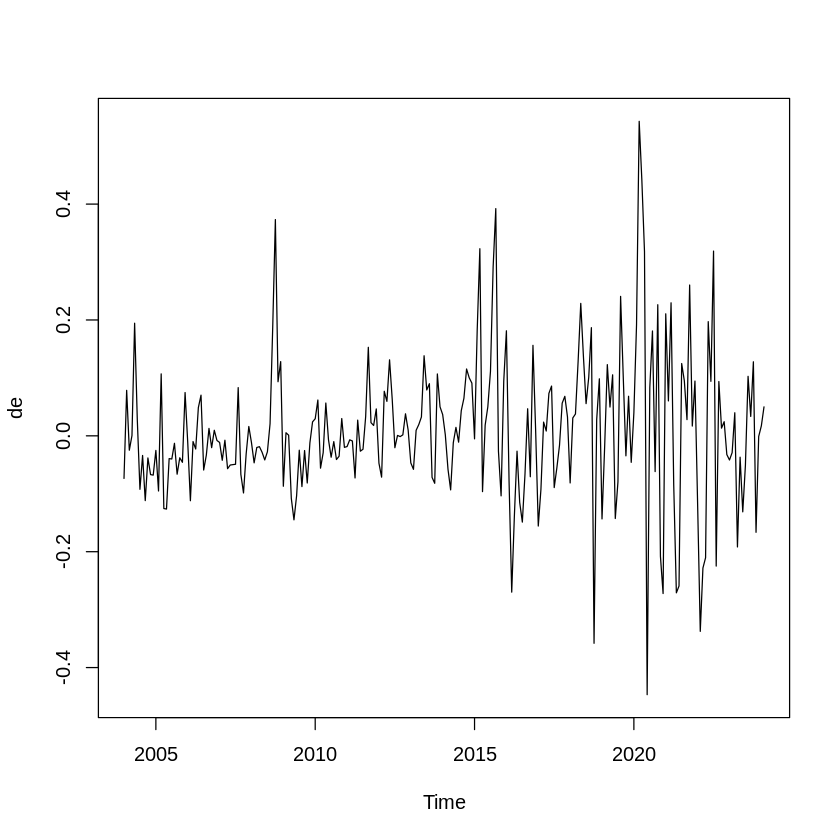

# VAR: função impulso-resposta

In [ ]:
install.packages("vars", quiet = TRUE)

also installing the dependencies ‘zoo’, ‘strucchange’, ‘urca’, ‘lmtest’, ‘sandwich’




In [ ]:
library(vars)

## VAR(2) com Dummies sazonais

Vamos trabalhar com o VAR(2) com dummies sazonais.

De acordo com o modelo estimado, responda:

1) Qual é o impacto do aumento na taxa de inflação de preços livres na taxa de juros real? O que isso nos diz sobre a conduta do Banco Central?

2) Qual é o impacto do aumento na taxa de inflação de preços administrados na inflação de preços livres?

In [ ]:
irf = irf( var2, impulse='liv', ortho=TRUE, n.ahead = 12, ci=0.95, runs=100)

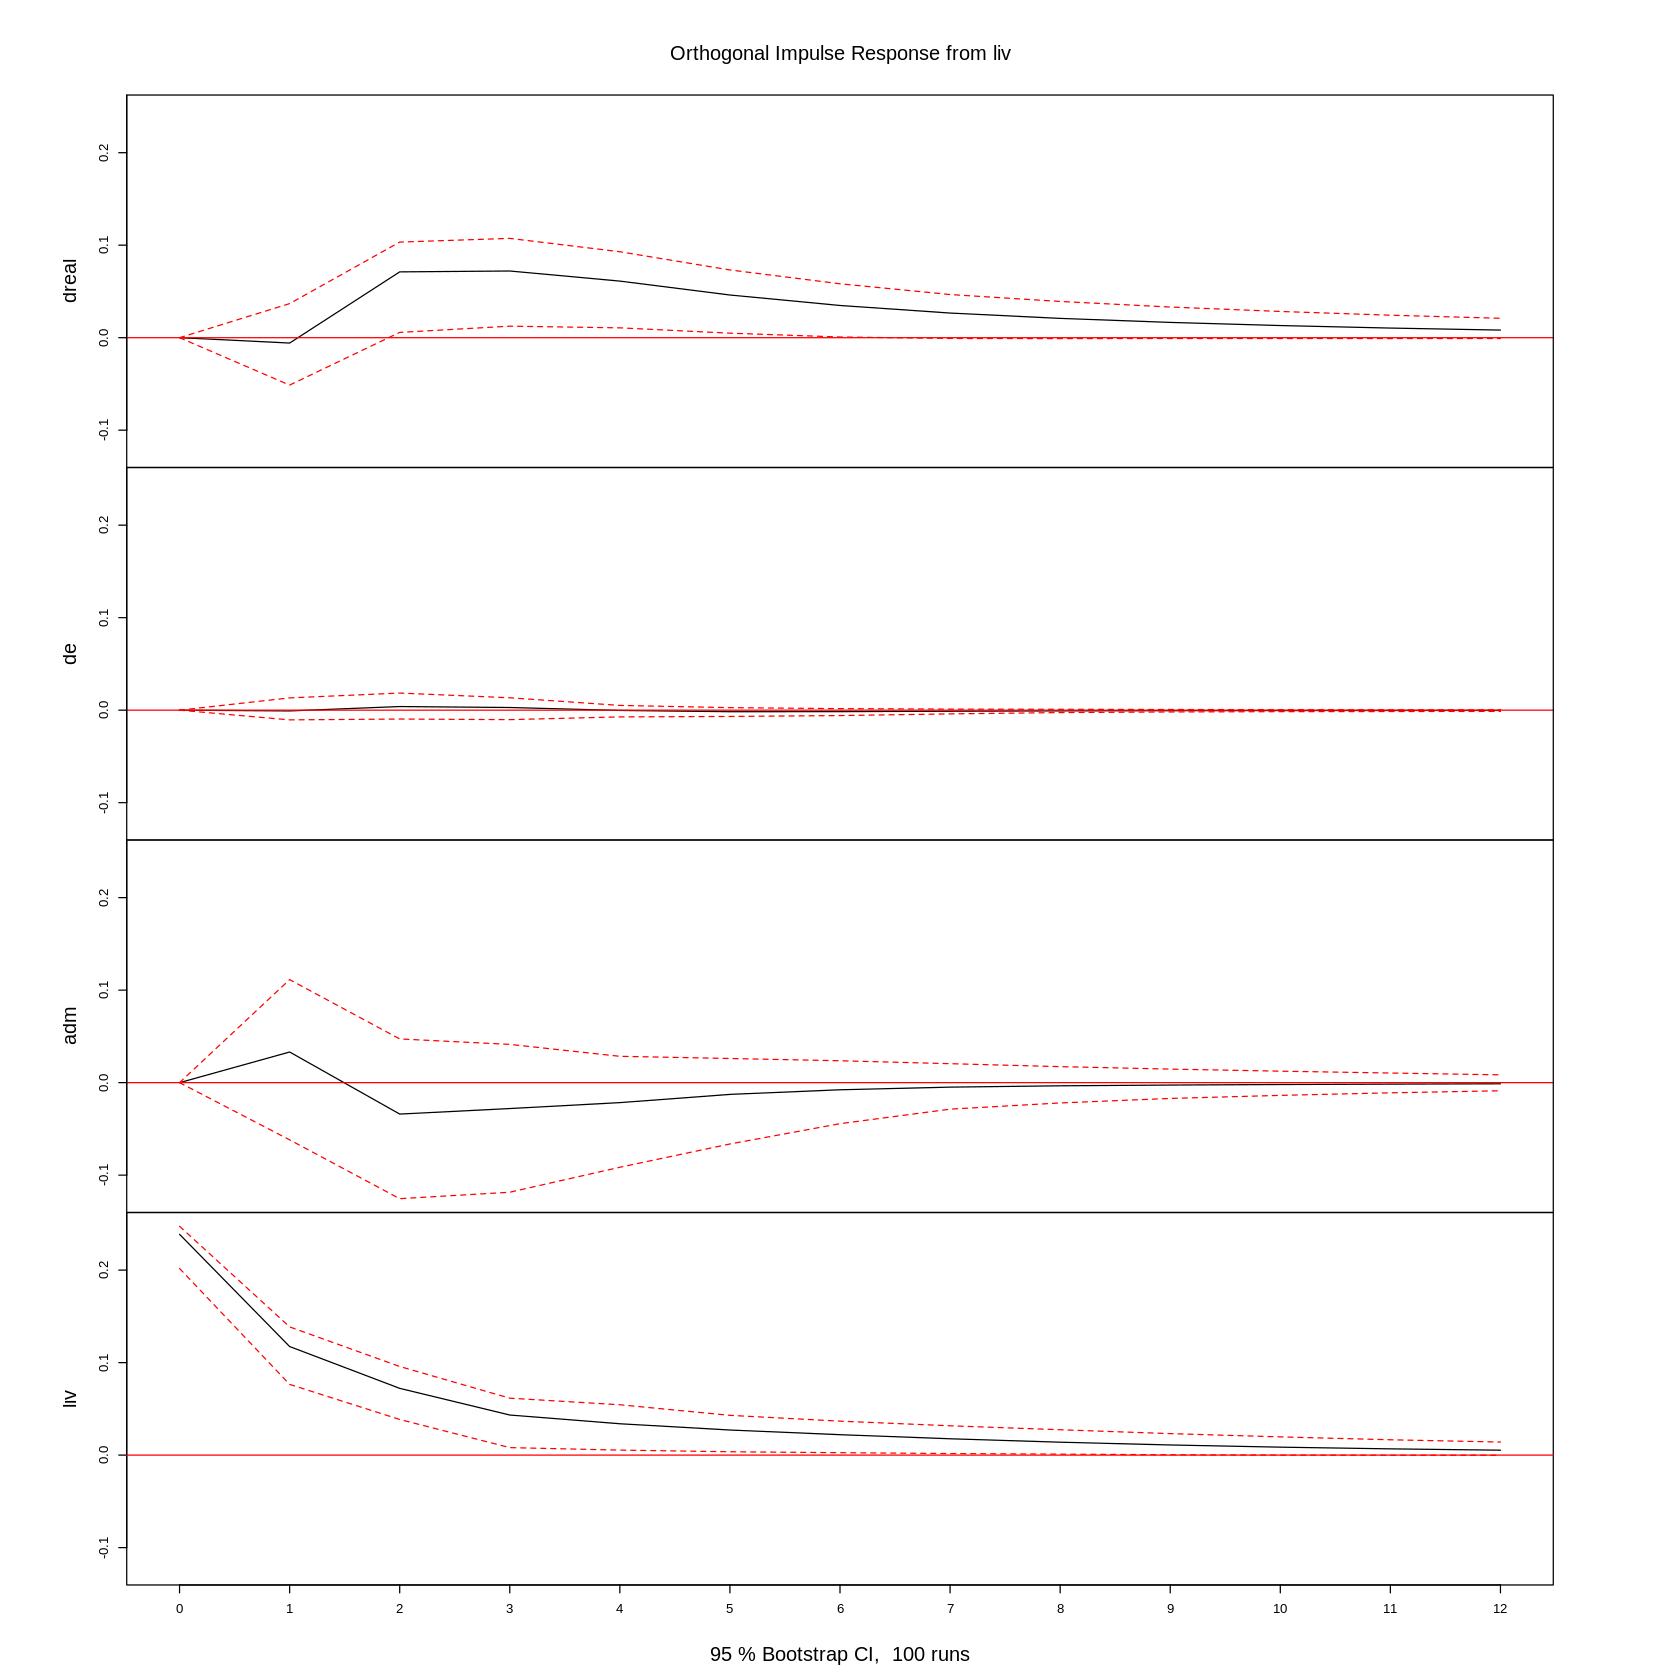

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 14)

plot( irf, cex.lab = 1.5 )

Vamos verificar o que tem no objeto 'irf'. Nessa lista, vamos extrair a 'irf' com o impulso nos na taxa de inflação de preços livres ("liv" no código baixo; provavelmente, você precisará adaptá-lo):

In [ ]:
head( irf$irf$liv, 2 )

dreal,de,adm,liv
0.000000000,0.0000000000,0.00000000,0.2387103
-0.005798467,-0.0008250177,0.03312435,0.1173798


Podemos melhor um pouco a estética padrão dos gráficos das funções impulso-resposta. Para isso, note que, em cada gráfico, vamos utilizar a coluna respectiva da variável que queremos a resposta (por exemplo, no primeiro gráfico, a resposta da taxa de câmbio nominal está localizada na segunda coluna, por isso o número 2 aparece algumas vezes nele). Para colocarmos o intervalo de confiança, adicionamos os limites superior ('Upper') e inferior ('Lower'). Adapte o código abaixo de acordo com a nomenclatura para as variáveis que você utilizou nas aulas anteriores:

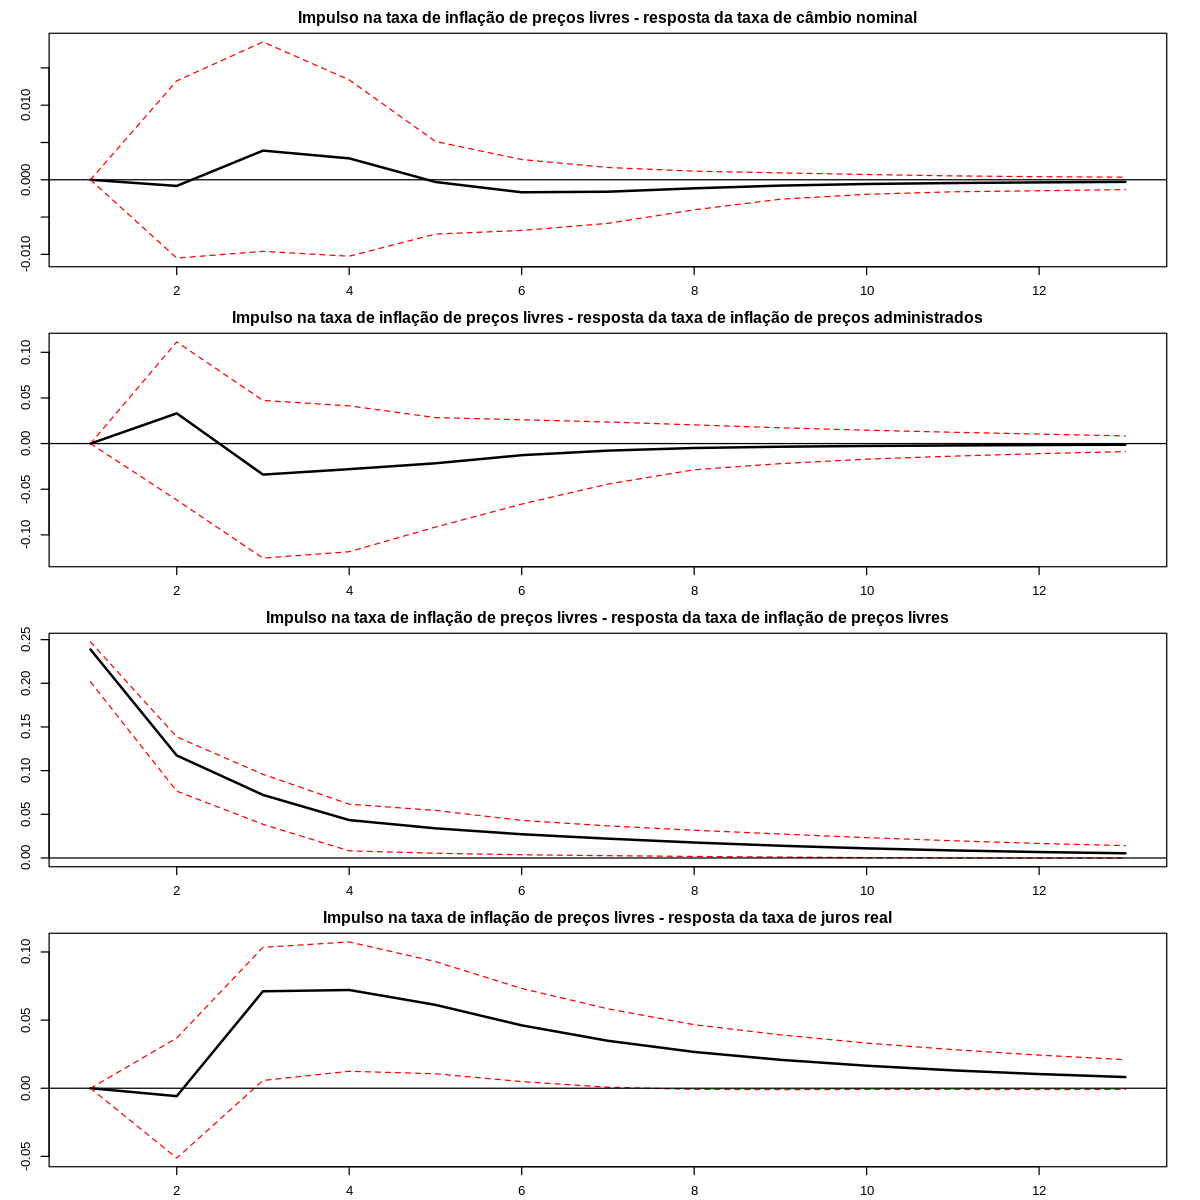

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)

par(mfrow=c(4,1), mar=c(2,3,2,2)+0.1)

# Gráfico 1
plot( irf$irf$liv[ , 2 ],
      main = "Impulso na taxa de inflação de preços livres - resposta da taxa de câmbio nominal",
      type ='l', lwd=2, ylab= "", xlab="períodos",
      ylim=range( irf$Lower$liv[ , 2 ], irf$Upper$liv[ , 2 ] ) )
lines( irf$Upper$liv[ , 2 ], lty=2, col="red")
lines( irf$Lower$liv[ , 2 ], lty=2, col="red")
abline(h=0)

# Gráfico 2
plot( irf$irf$liv[ , 3 ],
      main = "Impulso na taxa de inflação de preços livres - resposta da taxa de inflação de preços administrados",
      type ='l', lwd=2, ylab= "", xlab="períodos",
      ylim=range( irf$Lower$liv[ , 3 ], irf$Upper$liv[ , 3 ] ) )
lines( irf$Upper$liv[ , 3 ], lty=2, col="red")
lines( irf$Lower$liv[ , 3 ], lty=2, col="red")
abline(h=0)

# Gráfico 3
plot( irf$irf$liv[ , 4 ],
      main = "Impulso na taxa de inflação de preços livres - resposta da taxa de inflação de preços livres",
      type ='l', lwd=2, ylab= "", xlab="períodos",
      ylim=range( irf$Lower$liv[ , 4 ], irf$Upper$liv[ , 4 ] ) )
lines( irf$Upper$liv[ , 4 ], lty=2, col="red")
lines( irf$Lower$liv[ , 4 ], lty=2, col="red")
abline(h=0)

# Gráfico 4
plot( irf$irf$liv[ , 1 ],
      main = "Impulso na taxa de inflação de preços livres - resposta da taxa de juros real",
      type ='l', lwd=2, ylab= "", xlab="períodos",
      ylim=range( irf$Lower$liv[ , 1 ], irf$Upper$liv[ , 1 ] ) )
lines( irf$Upper$liv[ , 1 ], lty=2, col="red")
lines( irf$Lower$liv[ , 1 ], lty=2, col="red")
abline(h=0)

De acordo com o modelo estimado, você acredita que o BCB responde mais rápido ao aumento dos preços administrados ou de preços livres? Justifique.

## Desafio

Pesquise sobre o chamado "price puzzle" em modelos VAR e compare com os resultados das respostas das taxas de inflação aos aumentos na taxa de juros real.

# Reflexão

Será que a identificação recursiva com base na ordem das variáveis proposta faz sentido para analisarmos choques estruturais?